# Importing main libraries for analysis

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import glob
import imageio
from sklearn.feature_extraction import image
import json

# Import data for analysis

In [173]:
trl_df=pd.read_excel(r'C:\Users\aczd087\Downloads/organ_blob_dimension_info.xlsx')

In [250]:
cd F:\Biomedical images\Train\NIFTI_MR_512x512 seg_rename\NIFTI_MR_512x512\NIFTI_MR_512x512_png_64grey_lvl\t1dual_outphase\ground

F:\Biomedical images\Train\NIFTI_MR_512x512 seg_rename\NIFTI_MR_512x512\NIFTI_MR_512x512_png_64grey_lvl\t1dual_outphase\ground


In [251]:
mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}

In [253]:
mask_file_list=glob.glob('*.png')
mask_file_list[0]

'Pat_10_t1dual_outphase_slice_no_10_512x512_grey_lvl_64.png'

In [260]:
Pat_str='pat_'
img_type_str='_t1dual'
img_types_lst=['t2spir','t1dual']

In [262]:

final_lst=[]
for file in mask_file_list:
    
    Pat_id_act=int(file[file.lower().find(Pat_str)+len(Pat_str):file.lower().find(img_type_str)])
    
    tmp_img_type=[x for x in img_types_lst if file.lower().find(x)!=-1]
    
    #Getting slice no from file name
    slic_no_lwr_bnd=file.lower().find('slice_no_')
    slic_no_uppr_bnd=file.lower().rfind('_512x512')
    slice_no=int(file[slic_no_lwr_bnd+len('slice_no_'):slic_no_uppr_bnd])
    
    tmp_img=imageio.imread(file)
    
    tmp_img_uniq_val=np.unique(tmp_img,return_counts=True)
    tmp_dict={}
    for int_val,pixel_cnts in list(zip(tmp_img_uniq_val[0],tmp_img_uniq_val[1])):
        int_val_key=mask_intensities[int_val]
        
        tmp_dict[int_val_key]=pixel_cnts
    
    tmp_dict['slice_no']=slice_no
    tmp_dict['image_type']=tmp_img_type[0]
    tmp_dict['Patient_id']=Pat_id_act
    
    final_lst.append(tmp_dict)


In [264]:
org_area_df=pd.DataFrame(final_lst)

org_area_df_melt=org_area_df.melt(id_vars=['Patient_id','image_type','slice_no'],
                                  value_vars=['spleen','Background','Liver',
                             'r_kidney','l_kidney'])

org_area_df_melt_t1dual=org_area_df_melt

In [286]:
cd ..

F:\Biomedical images\Train


In [287]:
org_area_df_melt_final.head()

,Patient_id,image_type,slice_no,variable,value
0,10,t1dual,10,spleen,NaN
1,10,t1dual,11,spleen,NaN
2,10,t1dual,12,spleen,NaN
3,10,t1dual,13,spleen,NaN
4,10,t1dual,14,spleen,NaN


In [270]:
org_area_df_melt_final=org_area_df_melt_t1dual.append(org_area_df_melt_t2spir,ignore_index=True)
org_area_df_melt_final.to_excel('Pixel_cnts_per_org_per_imgtype_perPatientperslice_table.xlsx')

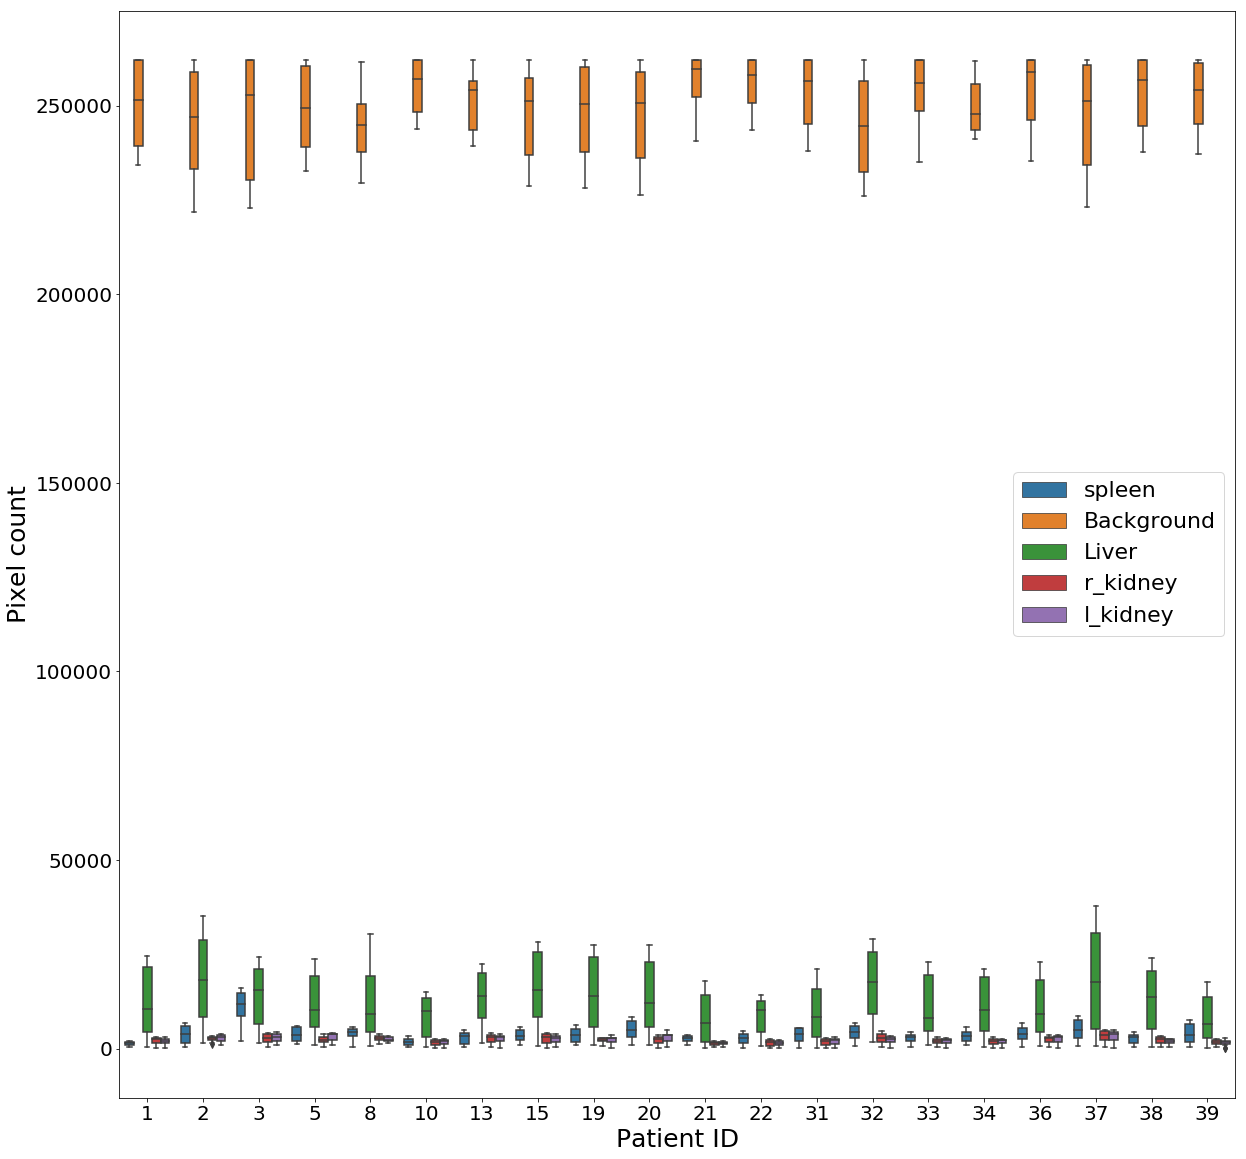

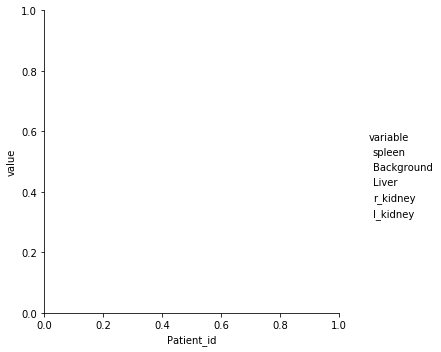

In [282]:
#org_area_df_melt_final[(org_area_df_melt_final['variable']!='Background')&
gen_boxplot(org_area_df_melt_final[(org_area_df_melt_final['image_type']=='t1dual')],
            'Patient_id','value','Patient ID','Pixel count',
            'boxplot_patient_id_vs_pixel_cnt_vs_org_type_plus_bkgrnd_t1dual.jpeg','variable',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

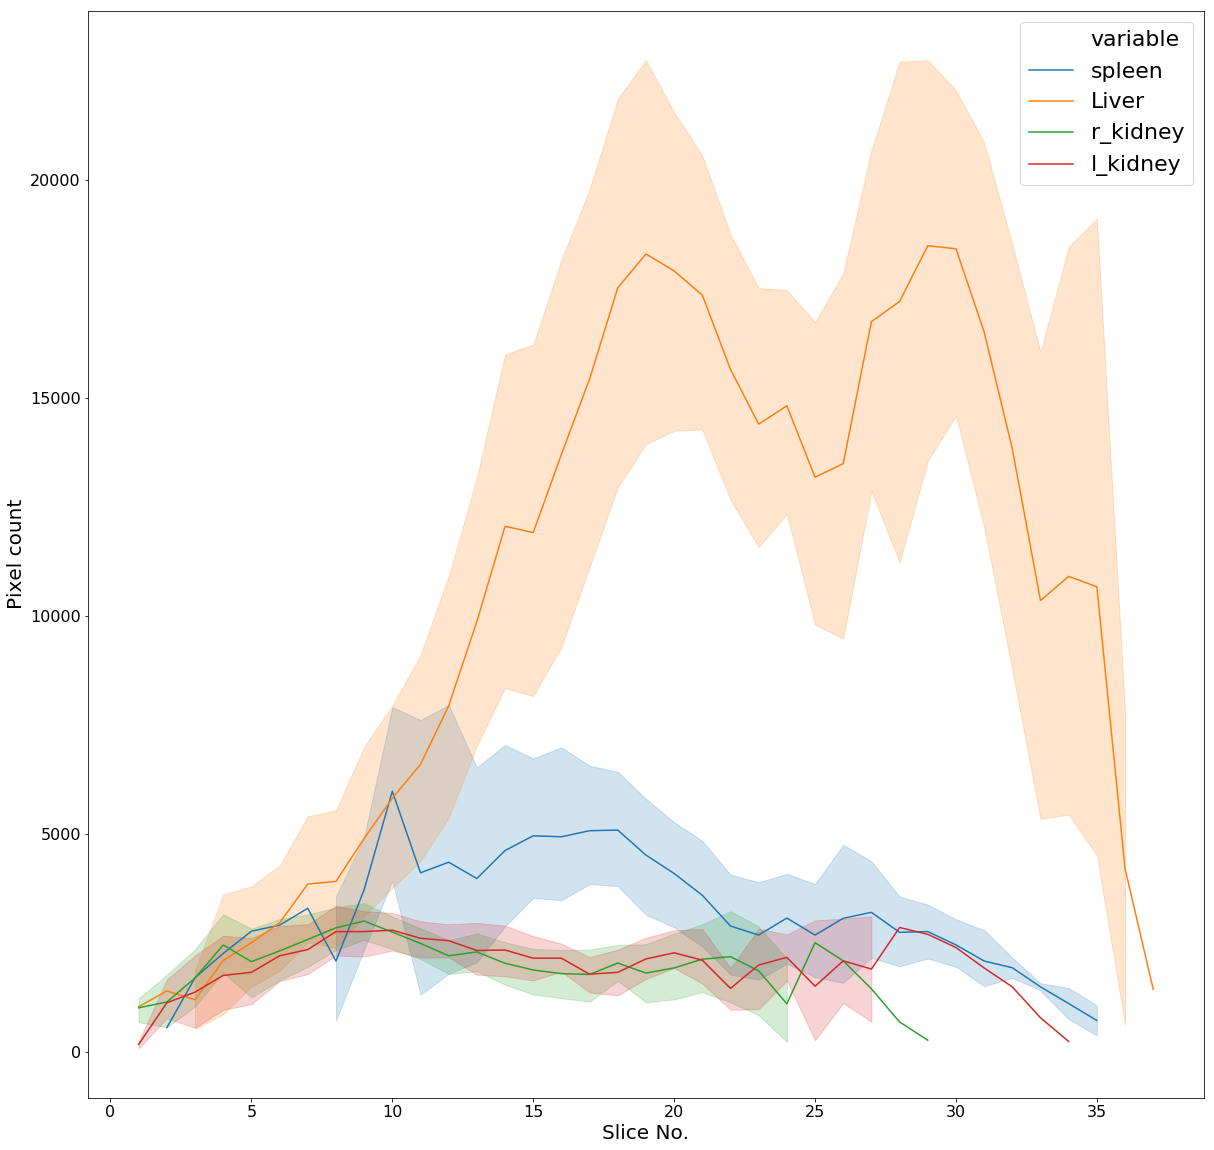

In [292]:
#(org_area_df_melt_final['variable']!='Background')&
gen_lineplot(org_area_df_melt_final[(org_area_df_melt_final['variable']!='Background')&(org_area_df_melt_final['image_type']=='t1dual')],
             'slice_no','value','Slice No.','Pixel count',
             'lineplot_t1dual_slice_no_vs_pixel_cnt_vs_org_type_no_background.jpeg','variable',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)


In [293]:
ls

 Volume in drive F is Seagate Expansion Drive
 Volume Serial Number is A2E2-92D1

 Directory of F:\Biomedical images\Train

11/10/2019  21:44    <DIR>          .
11/10/2019  21:44    <DIR>          ..
11/10/2019  20:18    <DIR>          EDA info
11/10/2019  21:44         3,913,388 lineplot_t1dual_slice_no_vs_pixel_cnt_vs_org_type_no_background.jpeg
11/10/2019  21:42         3,197,703 lineplot_t1dual_slice_no_vs_pixel_cnt_vs_org_type_plus_background.jpeg
11/10/2019  21:44         3,783,248 lineplot_t2spir_slice_no_vs_pixel_cnt_vs_org_type_no_background.jpeg
11/10/2019  21:43         3,272,601 lineplot_t2spir_slice_no_vs_pixel_cnt_vs_org_type_plus_background.jpeg
10/10/2019  15:58    <DIR>          mask_orgn_spec_img
03/10/2019  20:12    <DIR>          MR
04/10/2019  18:13    <DIR>          MR_masks
08/10/2019  22:50    <DIR>          NIFTI_MR_512x512
09/10/2019  11:02    <DIR>          NIFTI_MR_512x512 seg_rename
08/10/2019  22:43       227,871,957 NIFTI_MR_512x512.zip
09/10/2019  15:13

# Pre process data for analysis 

In [174]:
file_types=trl_df['image_type'].unique()
pat_nos=trl_df['patient_id'].unique()
org_types=trl_df['organ_type'].unique()



In [ ]:
trl_df.keys()

In [ ]:
file_types

In [ ]:
grouped_img_type_vs_org = trl_df.groupby(['image_type', 'organ_type']).agg({'tmp_area': ['mean','min','max','var']})
grouped_img_type_vs_org

# Visualise results for analysis organ analysis

In [ ]:
grouped_img_type_vs_org_slice_id = trl_df.groupby(['image_type', 'organ_type','slice_id']).agg({'tmp_area': ['mean','min','max','var']})
grouped_img_type_vs_org_slice_id

In [ ]:
sns.catplot(ax=ax,x='image_type',y='tmp_area',hue='organ_type',data=trl_df,kind='box')
ax.set_xlabel('Image type',fontsize=20)
ax.set_ylabel('Organ contour area (pixel values)',fontsize=20)
figure.savefig('boxplot_img_type_vs_tmp_area_vs_org_type.jpeg',dpi=dpi_sp)

In [ ]:
trl_df.loc[(trl_df['image_type']=='t2spir_data')&(trl_df['image_type']=='t1dual_inphase'),:]

In [ ]:
gen_boxplot(trl_df[(trl_df['image_type']=='t1dual_inphase')|(trl_df['image_type']=='t2spir_data')],
            'image_type','tmp_area','Image type','Organ contour area (pixel values)',
            'boxplot_img_type_2_vs_tmp_area_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(trl_df,'image_type','tmp_area','Image type','Organ contour area (pixel values)',
            'boxplot_img_type_vs_tmp_area_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

gen_boxplot(trl_df[trl_df['image_type']=='t1dual_outphase'],'patient_id','tmp_area',
            'Image type','Organ contour area (pixel values)',
            'boxplot_t1dual_outphase_pat_id_vs_tmp_area_vs_org_type.jpeg',
            'organ_type',fig_dim=(20,20),dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

gen_boxplot(trl_df[trl_df['image_type']=='t1dual_inphase'],'patient_id','tmp_area',
            'Image type','Organ contour area (pixel values)',
            'boxplot_t1dual_inphase_pat_id_vs_tmp_area_vs_org_type.jpeg',
            'organ_type',fig_dim=(20,20),dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

gen_boxplot(trl_df[trl_df['image_type']=='t2spir_data'],'patient_id','tmp_area',
            'Image type','Organ contour area (pixel values)',
            'boxplot_t2spir_pat_id_vs_tmp_area_vs_org_type.jpeg',
            'organ_type',fig_dim=(20,20),dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_lineplot(trl_df[trl_df['image_type']=='t1dual_outphase'],
             'patient_id','tmp_area','Patient ID','Organ contour area (pixel values)',
             'lineplot_t1dual_outphase_pat_id_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t1dual_inphase'],
             'patient_id','tmp_area','Patient ID','Organ contour area (pixel values)',
             'lineplot_t1dual_inphase_pat_id_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t2spir_data'],
             'patient_id','tmp_area','Patient ID','Organ contour area (pixel values)',
             'lineplot_t2spir_inphase_pat_id_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

In [ ]:
gen_lineplot(trl_df[trl_df['image_type']=='t1dual_outphase'],
             'slice_id','tmp_area','MRI Slice No','Organ contour area (pixel values)',
             'lineplot_t1dual_outphase_slc_no_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t1dual_inphase'],
             'slice_id','tmp_area','MRI Slice No','Organ contour area (pixel values)',
             'lineplot_t1dual_inphase_slc_no_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t2spir_data'],
             'slice_id','tmp_area','MRI Slice No','Organ contour area (pixel values)',
             'lineplot_t2spir_inphase_slc_no_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

In [241]:
def gen_boxplot(df_set,x_val_col,y_val_col,xlabel,ylabel,fig_f_name,hue_col=None,fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=20,tick_f_size_sp=30):
    """the purpose of this method i sto generate boxplots in a uniform manner"""
    
    fig, ax=plt.subplots(figsize=fig_dim)

    sns.catplot(ax=ax,x=x_val_col,y=y_val_col,hue=hue_col,data=df_set,kind='box')
    #Generate x and y labels
    ax.legend(fontsize='22', title_fontsize='20')
    ax.set_xlabel(xlabel,fontsize=fontsize_sp)
    ax.set_ylabel(ylabel,fontsize=fontsize_sp)
    ax.tick_params(labelsize=tick_f_size_sp)
    
    figure = ax.get_figure()    
    figure.savefig(fig_f_name,dpi=dpi_sp)
    

In [239]:
def gen_lineplot(df_set,x_val_col,y_val_col,xlabel,ylabel,fig_f_name,hue_col=None,
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16):
    
    fig, ax=plt.subplots(figsize=fig_dim)
    
        
    sns.lineplot(ax=ax,x=x_val_col,y=y_val_col,hue=hue_col,data=df_set)
    
    
    ax.legend(fontsize='22', title_fontsize='20')
    ax.set_xlabel(xlabel,fontsize=fontsize_sp)
    ax.set_ylabel(ylabel,fontsize=fontsize_sp)
    ax.tick_params(labelsize=tick_f_size_sp)
    
    figure = ax.get_figure()    
    figure.savefig(fig_f_name,dpi=dpi_sp)
    


In [240]:
def bytescaling(data, cmin=None, cmax=None, high=255, low=0):
    """
    Converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255). If the input image already has 
    dtype uint8, no scaling is done.
    :param data: 16-bit image data array
    :param cmin: bias scaling of small values (def: data.min())
    :param cmax: bias scaling of large values (def: data.max())
    :param high: scale max value to high. (def: 255)
    :param low: scale min value to low. (def: 0)
    :return: 8-bit image data array
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        high = 255
    if low < 0:
        low = 0
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)

# Visualise results for Organ intensity

In [167]:
img_types=['t2spir','t1dual_inphase','t1dual_outphase']
organs=['background','liver','right kidney','left kidney','r_kidney','spleen','l_kidney']
Pat_str='patient_id_'
pat_id_lst=['t1d','t2s']
dir_pth='F:\Biomedical images\Train\mask_orgn_spec_img'

## Image organ extraction functions

In [ ]:
def div_patches_img(tmp_img_255,pat_size=(3,3)):
    """The purpose of this method is to divide patch of an imageinto sections and filter off mainly black background pieces
    for variance mean etc statisitcal analysis."""
    patches = image.extract_patches_2d(tmp_img_255, pat_size)
    bool_set=np.any(patches!=0,axis=(1,2))
    return patches[bool_set,:,:]

def np_stat_sum(tmp_img_pat):
    """The purpose of this method is to perform statical analysis in regards to numpy statisicall summayr analysis"""
    
    return (tmp_img_pat.mean(),np.median(tmp_img_pat),np.var(tmp_img_pat.flatten()),
           np.min(tmp_img_pat),np.max(tmp_img_pat))

In [ ]:
def dict_concat_np(dict_set,array_key,array):
    """The purpose of this method is to perform numpy concatenation between arrays"""
    
    if array_key in dict_set.keys():        
        dict_set[array_key]=np.concatenate((dict_set[array_key],
                                           array.flatten()))
    else:
        dict_set[array_key]=array.flatten()
        
    return dict_set

def gen_np_dict(dict_set,dict_name):
    """Generate dictionary set json"""
    np.save(dict_name,dict_set)

In [3]:
cd F:\Biomedical images\Train\EDA info

F:\Biomedical images\Train\EDA info


## Write /aggregate organ intensity's to numpy dict files for analysis and visualisation 

In [ ]:
#Iterate through for files in directory path. 
Analysis_lst=[]

per_img_pat_org={}
per_img_slc_org={}
per_img_org={}

for file in glob.glob(dir_pth+'/*.png'):
    #print(file)
    tmp_img=imageio.imread(file)
    
    img=[x for x in img_types if file.lower().find(x)!=-1]
    organ=[y for y in organs if file.lower().find(y)!=-1]
    #Patient id determined from 
    file_idx=[file.lower().find(x) for x in pat_id_lst if file.lower().find(x)!=-1]
    Pat_id_act=file[file.lower().find(Pat_str)+len(Pat_str):file_idx[0]]
    #Getting slice no from file name
    slic_no_uppr_bnd=file.lower().find('uint8.png')
    slic_no_lwr_bnd=file.lower().rfind('mask_')
    slice_no=file[slic_no_lwr_bnd+len('mask_'):slic_no_uppr_bnd]
    
        #Dividing image into patches
    tmp_img_pat=div_patches_img(tmp_img)
    try:        
        #Getting statistics
        mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        #Generating list for analysis
        
        
    except ValueError as e:
        print('val error')
        print(tmp_img_pat.shape)
        tmp_img_pat=div_patches_img(tmp_img,(2,2))
        print(tmp_img_pat.shape)
        if tmp_img_pat.shape[0]!=0:
            #Getting statistics
            mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        else:
            tmp_img_pat=div_patches_img(tmp_img,(1,1))
            #mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
    
    
    img_pat_org_key=img[0]+'_'+organ[0]+'_'+Pat_id_act
    img_pat_slc_key=img[0]+'_'+organ[0]+'_'+slice_no
    per_img_org_key=img[0]+'_'+organ[0]
    
    per_img_pat_org=dict_concat_np(per_img_pat_org,img_pat_org_key,tmp_img_pat)
    per_img_slc_org=dict_concat_np(per_img_slc_org,img_pat_slc_key,tmp_img_pat)
    per_img_org=dict_concat_np(per_img_org,per_img_org_key,tmp_img_pat)

In [ ]:

gen_np_dict(per_img_pat_org,'per_img_per_pat_org_arrs_dict.npy')
gen_np_dict(per_img_slc_org,'per_img_per_slc_org_arrs_dict.npy')
gen_np_dict(per_img_org,'per_img_org_arrs_dict.npy')

## Load numpy dictionary for visualisation

In [78]:
per_img_pat_org=np.load('per_img_per_pat_org_arrs_dict.npy').all()
per_img_slc_org=np.load('per_img_per_slc_org_arrs_dict.npy').all()
per_img_org=np.load('per_img_org_arrs_dict.npy').all()

## Visualisation functions

In [51]:
def gen_man_clr_palette(filt_df:pd.DataFrame,col_str:str,clr_palette_dict:dict)->list:
    """Generate manual colour palette based on dictionary for applying to seaborn boxplots"""
    man_colour_palette=[]
    #Iterating through dataframe columns and returning generic dicitonary of values. 
    for org_types in list(filt_df[col_str]):
        man_colour_palette.append(clr_palette_dict[org_types])
        
    return man_colour_palette

In [48]:
def gen_man_xtick_lbls(filt_df:pd.DataFrame,col_name:str,xtick_step_size:tuple)->list:
    #Creating custom xticks for analysis
    xtick_lst=list(filt_df[col_name])
    
    return [s if (i+xtick_step_size[0])%xtick_step_size[1]==0 else '' for i,s in enumerate(xtick_lst)]

In [72]:
def gen_np_df_boxplot(filt_df:pd.DataFrame,array_col:str,xtick_labels:list,
                   hue_clr_palette:list,uniq_clr_palette:dict,x_axis_lbl:str,y_axis_lbl:str,
                   fig_dim=(30,30),lgd_x_y_axis_font_size='22',tick_font_size=20):
    """the purpose of this method is to generate a plot using a numpy array column in a dataframe with manual colour palette
    and x tick label inputs for analysisas seaborn does not work well with wide data sets. """
    
    fig,ax=plt.subplots(figsize=fig_dim)

    sns.boxplot(ax=ax,data=list(filt_df[array_col]),palette=hue_clr_palette)

    ax.set_xticklabels(xtick_labels)
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in uniq_clr_palette.values()]
    ax.legend(markers, uniq_clr_palette.keys(), numpoints=1,loc=1,
              fontsize=lgd_x_y_axis_font_size, title_fontsize='20',facecolor='white', framealpha=1)

    ax.set_xlabel(x_axis_lbl,fontsize=lgd_x_y_axis_font_size)
    ax.set_ylabel(y_axis_lbl,fontsize=lgd_x_y_axis_font_size)

    ax.tick_params(labelsize=tick_font_size)

In [73]:
def gen_np_df_lineplot(filt_df:pd.DataFrame,array_col:str,xtick_labels:list,
                   hue_clr_palette:list,uniq_clr_palette:dict,x_axis_lbl:str,y_axis_lbl:str,
                   fig_dim=(30,30),lgd_x_y_axis_font_size='22',tick_font_size=20):
    """the purpose of this method is to generate a plot using a numpy array column in a dataframe with manual colour palette
    and x tick label inputs for analysisas seaborn does not work well with wide data sets. """
    
    fig,ax=plt.subplots(figsize=fig_dim)

    sns.lineplot(ax=ax,data=list(filt_df[array_col]))

    ax.set_xticklabels(xtick_labels)
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in uniq_clr_palette.values()]
    ax.legend(markers, uniq_clr_palette.keys(), numpoints=1,loc=1,
              fontsize=lgd_x_y_axis_font_size, title_fontsize='20',facecolor='white', framealpha=1)

    ax.set_xlabel(x_axis_lbl,fontsize=lgd_x_y_axis_font_size)
    ax.set_ylabel(y_axis_lbl,fontsize=lgd_x_y_axis_font_size)

    ax.tick_params(labelsize=tick_font_size)

In [151]:
def gen_man_lineplot_with_err_bars(filt_df:pd.DataFrame,cat_col_str:str,
                                   x_cat_col_str:str,y_cat_col_str:str,x_lbl_txt,y_lbl_txt,cat_filt_list=['background'],
                                   x_y_lbl_fontsize=20,tick_fontsize=15,figdim=(20,20))->plt.figure:
    """the purpose of this method to generate manual error bars based on manual numpy array lists"""
    plt.figure(figsize=figdim)
    
    for vals in filt_df[cat_col_str].unique():

        if vals.lower() not in cat_filt_list:

            filt_df_org=filt_df[filt_df[cat_col_str]==vals].sort_values(x_cat_col_str)

            y_val=[np.median(x) for x in filt_df_org[y_cat_col_str]]
            x_val=[y for y in filt_df_org[x_cat_col_str]]
            y_val_err=[3*np.std(y) for y in filt_df_org[y_cat_col_str]]
            plt.errorbar(x_val, y_val, y_val_err,label=vals,alpha=0.5,
                         capsize=8,elinewidth=2,markeredgewidth=2)
    plt.grid(True)
    plt.legend(loc=0,fontsize=x_y_lbl_fontsize)
    plt.xlabel(x_lbl_txt,fontsize=x_y_lbl_fontsize)
    plt.ylabel(y_lbl_txt,fontsize=20)
    plt.tick_params(labelsize=tick_fontsize)
    

## Per image type analysis

In [156]:
per_img_org

{'t1dual_inphase_background': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_inphase_left kidney': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_inphase_liver': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_inphase_right kidney': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_inphase_spleen': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_outphase_background': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_outphase_left kidney': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_outphase_liver': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_outphase_right kidney': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't1dual_outphase_spleen': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't2spir_background': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't2spir_left kidney': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't2spir_liver': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 't2spir_right kidney': array([0, 0, 0, ..., 0, 0, 0], dtype

In [170]:
per_img_slc_org_idx=[]

for k,v in per_img_org.items():
    #Image set for analysis
    #ipdb.set_trace()
    img=[x for x in img_types if k.lower().find(x)!=-1]
    #Organ set for analysis
    organ=[y for y in organs if k.lower().find(y)!=-1]
    
    #mean,median,var,min_val,max_val=np_stat_sum(v)
    
    per_img_slc_org_idx.append([img[0],organ[0],v])

per_img_org_df=pd.DataFrame(per_img_slc_org_idx,columns=['image_type','organ','array'])

TypeError: can only concatenate str (not "list") to str

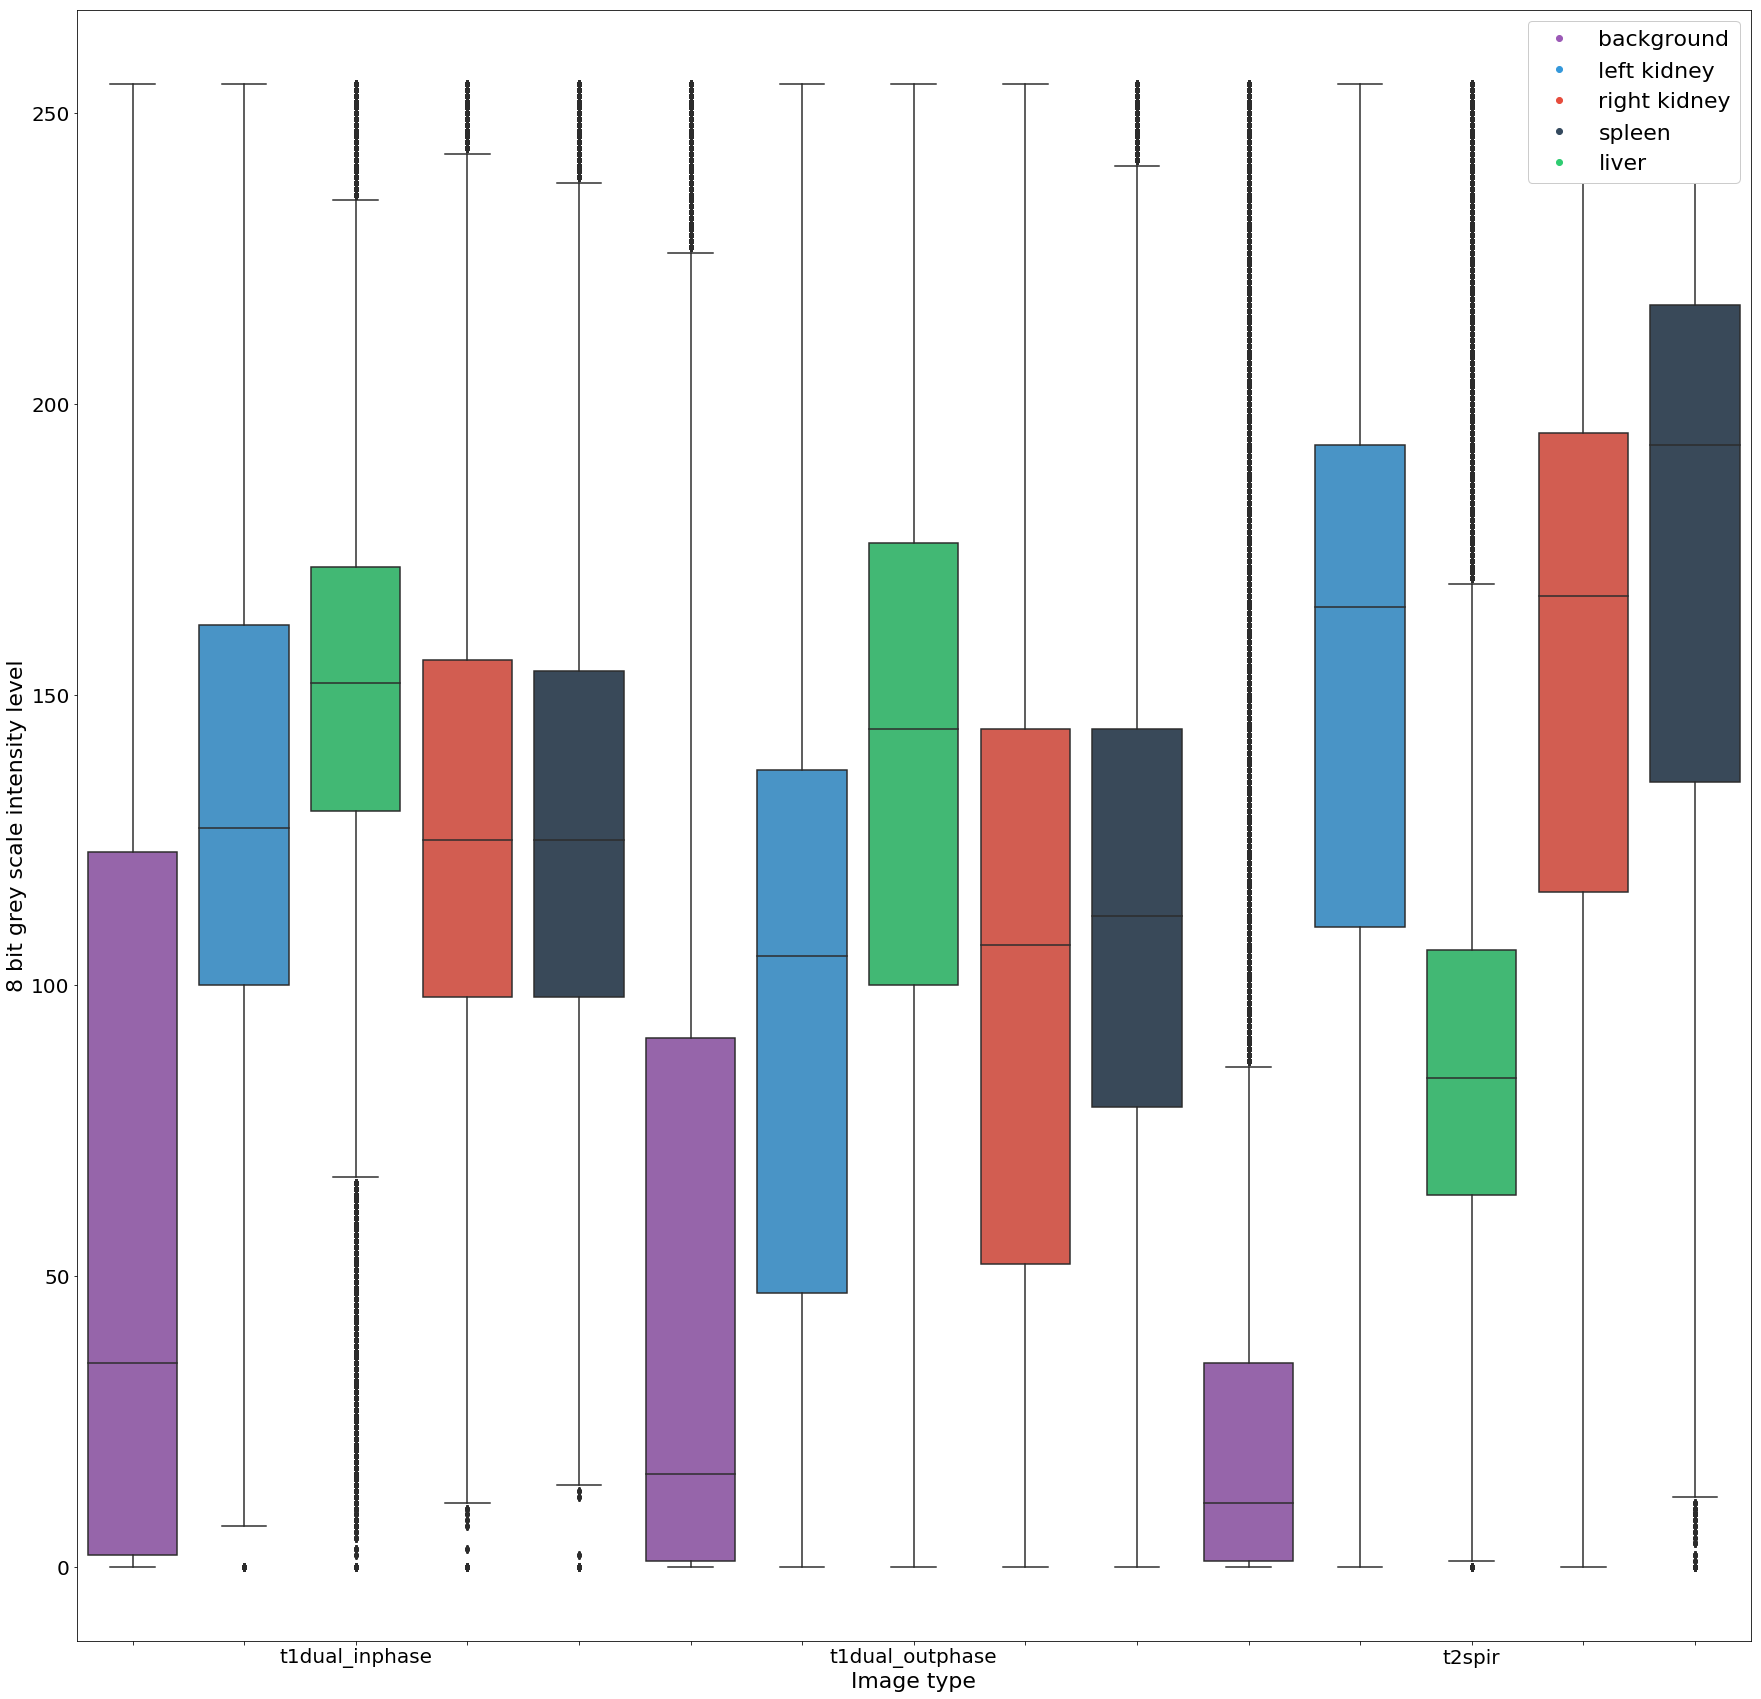

In [171]:


xtick_set=gen_man_xtick_lbls(per_img_org_df,'image_type',(3,5))

man_clr_palette=gen_man_clr_palette(per_img_org_df,'organ',flatui_palette_code)

gen_np_df_boxplot(per_img_org_df,'array',xtick_set,
                   man_clr_palette,flatui_palette_code,'Image type','8 bit grey scale intensity level',
                   fig_dim=(30,30),lgd_x_y_axis_font_size='22',tick_font_size=20)

final_fig=plt.gcf()

file_name='boxplot_org_hue_img_type_vs_8bit_greyscale_int_img_type_'+img_types+'.jpeg'

final_fig.savefig(file_name,dpi=600)

In [172]:
file_name='boxplot_org_hue_img_type_vs_8bit_greyscale_int_img_type.jpeg'

final_fig.savefig(file_name,dpi=600)

## Per image slice analysis 

In [ ]:
per_img_slc_org_idx

In [168]:
per_img_slc_org_idx=[]

for k,v in per_img_slc_org.items():
    ipdb.set_trace()
    #Image set for analysis
    img=[x for x in img_types if k.lower().find(x)!=-1]
    #Organ set for analysis
    organ=[y for y in organs if k.lower().find(y)!=-1]
    #Patient id 
    pat_id=int(k.split('_')[-1])
    
    #mean,median,var,min_val,max_val=np_stat_sum(v)
    
    per_img_slc_org_idx.append([img[0],organ[0],pat_id,v])

per_img_slc_no_org_df=pd.DataFrame(per_img_slc_org_idx,columns=['image_type','organ','slc_no','array'])

> <ipython-input-168-fc5c49ed9a4c>(6)<module>()
      5     #Image set for analysis
----> 6     img=[x for x in img_types if k.lower().find(x)!=-1]
      7     #Organ set for analysis

ipdb> img
['t', '1', 'd', 'u', 'a', 'l', '_', 'o', 'u', 't', 'p', 'h', 'a', 's', 'e']
ipdb> img_types
['t2spir', 't1dual_inphase', 't1dual_outphase']
ipdb> n
> <ipython-input-168-fc5c49ed9a4c>(8)<module>()
      7     #Organ set for analysis
----> 8     organ=[y for y in organs if k.lower().find(y)!=-1]
      9     #Patient id

ipdb> n
> <ipython-input-168-fc5c49ed9a4c>(10)<module>()
      9     #Patient id
---> 10     pat_id=int(k.split('_')[-1])
     11 

ipdb> organ
['background']
ipdb> organs
['background', 'liver', 'right kidney', 'left kidney', 'r_kidney', 'spleen', 'l_kidney']
ipdb> quit


BdbQuit: 

In [164]:
per_img_slc_no_org_df.head()

,image_type,organ,slc_no,array
0,t,background,10,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,t,background,11,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,t,background,12,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,t,background,13,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,t,background,14,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [139]:
per_img_slc_no_org_df.to_excel('per_img_per_slc_no_int_arr_df.xlsx')

In [36]:
flatui_palette_code= {'background':"#9b59b6",'left kidney':"#3498db",
          'right kidney':"#e74c3c",'spleen':"#34495e",'liver':"#2ecc71"}

In [91]:
per_img_pat_org_df.to_excel('per_img_per_pat_int_arr_df.xlsx')

In [90]:
per_img_slc_no_org_df['image_type'].unique()

array(['t1dual_inphase', 't1dual_outphase', 't2spir'], dtype=object)

### Analysis on slice no and array values

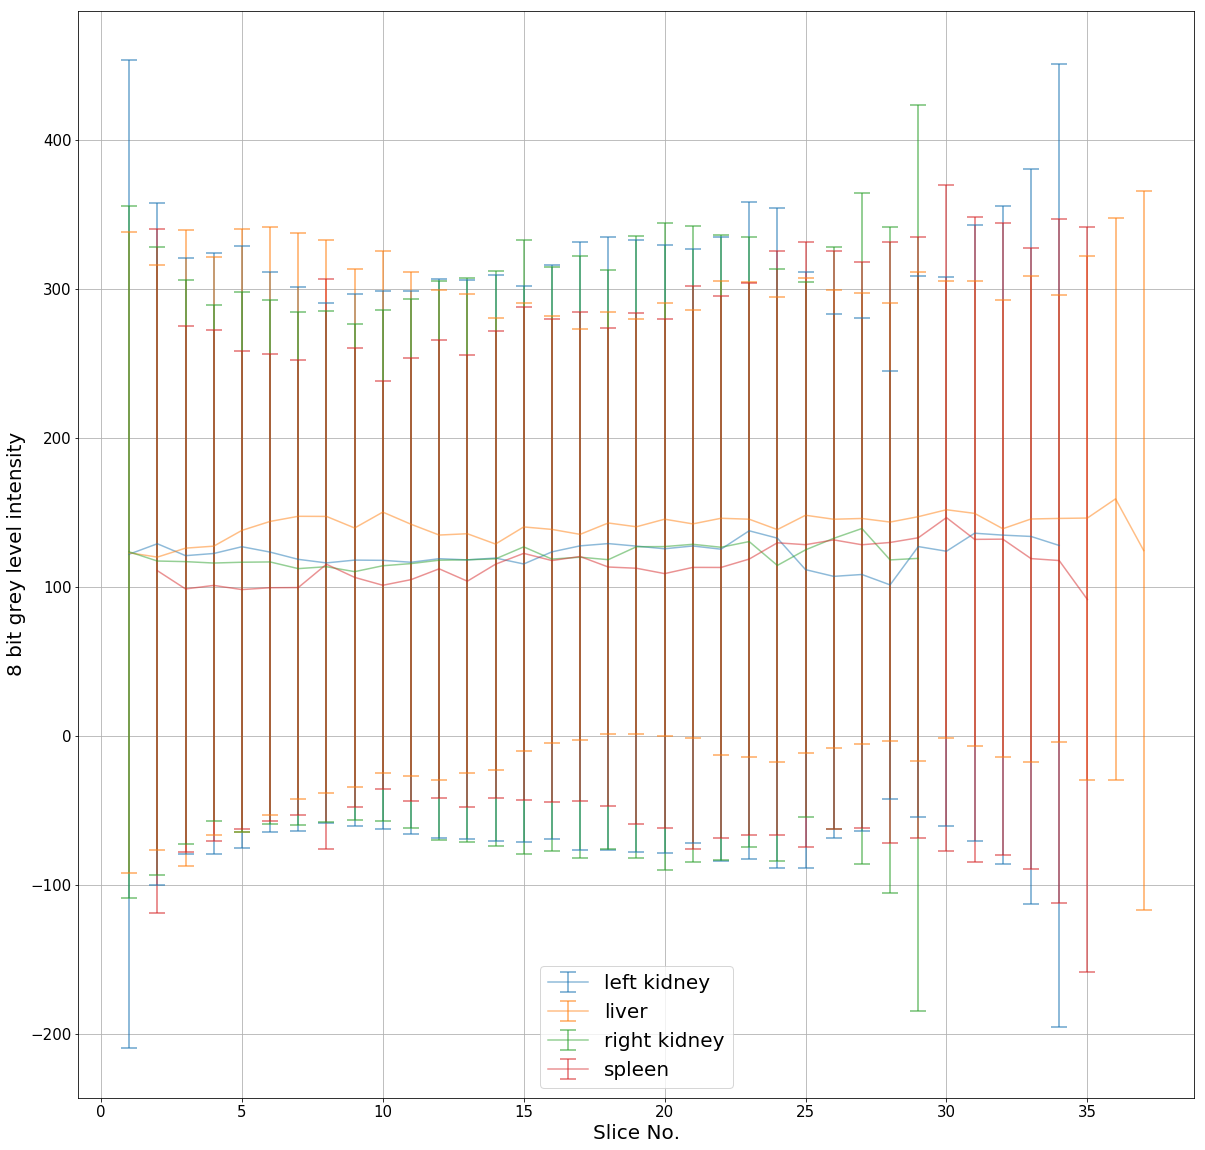

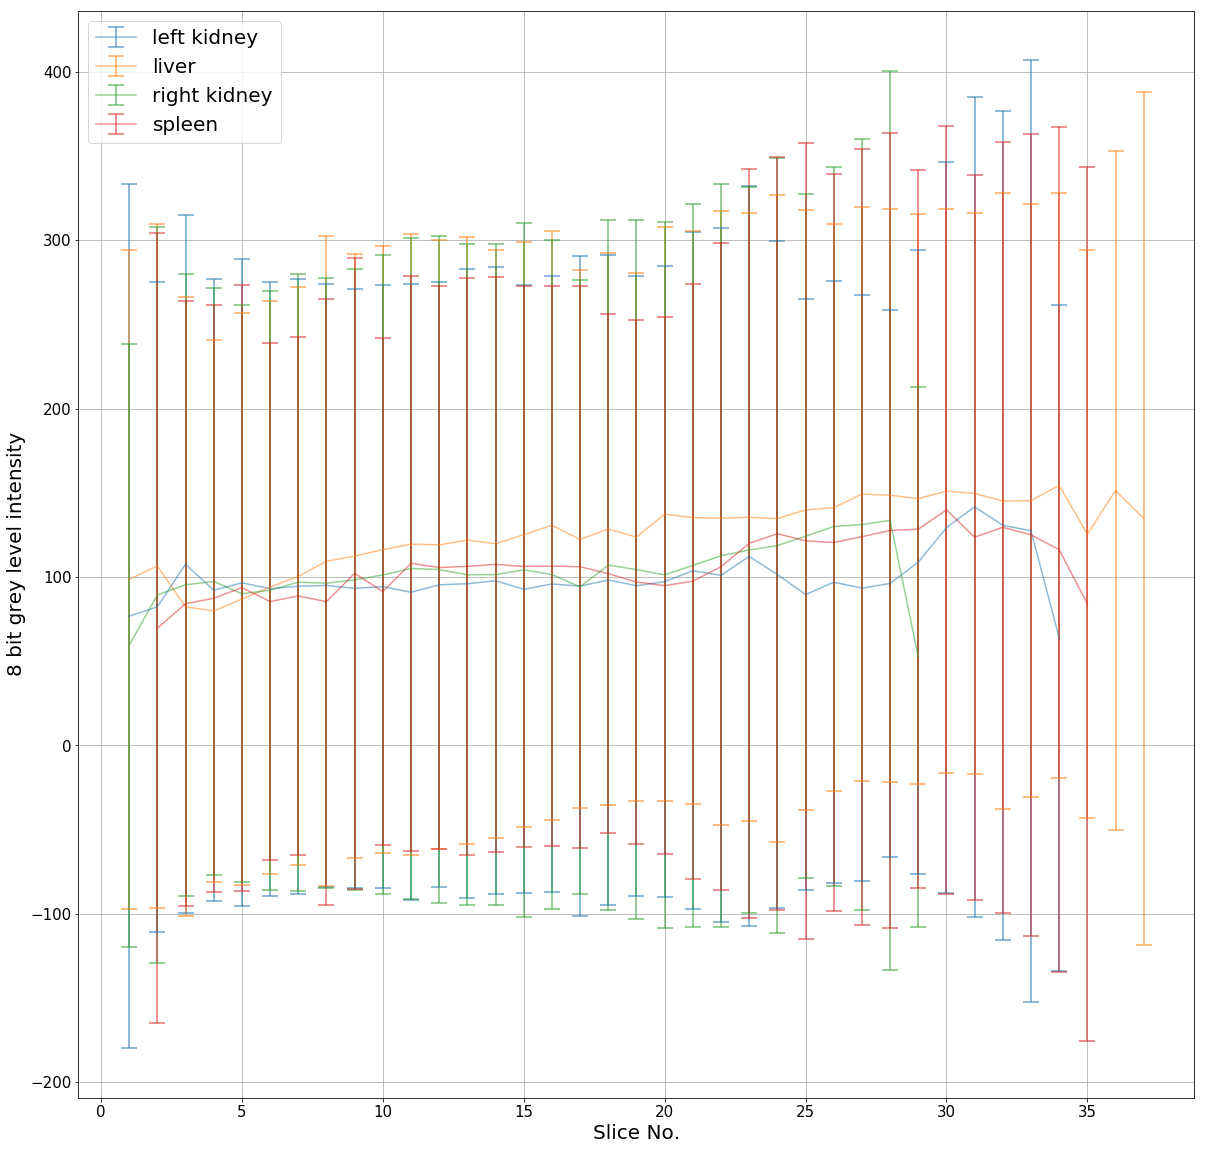

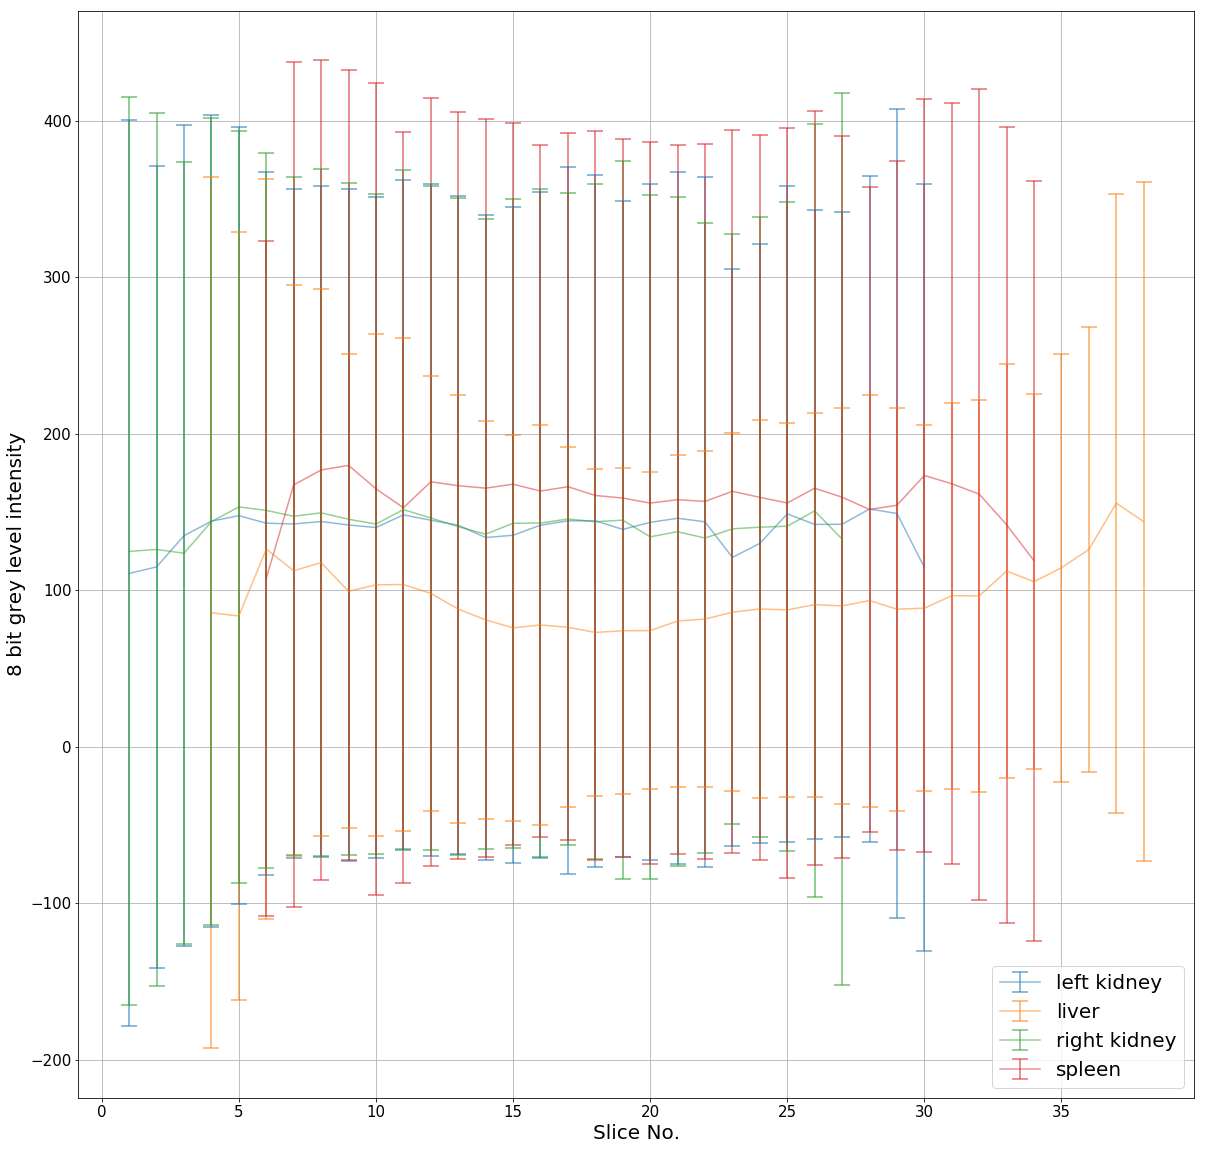

In [154]:
for imgs in per_img_slc_no_org_df['image_type'].unique():
        
    filt_df=per_img_slc_no_org_df[per_img_slc_no_org_df['image_type']==imgs]

    gen_man_lineplot_with_err_bars(filt_df,'organ',
                                       'slc_no','array','Slice No.','8 bit grey level intensity')
    
    final_fig=plt.gcf()

    file_name='lineplot_org_hue_slice_no_vs_8bit_greyscale_int_img_type_median_'+imgs+'.jpeg'

    final_fig.savefig(file_name,dpi=600)
    
    

### Analysis on patient id and array intensity values

In [ ]:
#Generating per patient images. 
for img_types in per_img_pat_org_df['image_type'].unique():
    
    print(img_types)

    filt_df=per_img_pat_org_df[per_img_pat_org_df['image_type']==img_types]

    xtick_set=gen_man_xtick_lbls(filt_df,'patient_id',(3,5))

    man_clr_palette=gen_man_clr_palette(filt_df,'organ',flatui_palette_code)

    gen_np_df_boxplot(filt_df,'array',xtick_set,
                       man_clr_palette,flatui_palette_code,'Patient ID','8 bit grey scale intensity level',
                       fig_dim=(30,30),lgd_x_y_axis_font_size='22',tick_font_size=20)

    final_fig=plt.gcf()

    file_name='boxplot_org_hue_pat_id_vs_8bit_greyscale_int_img_type_'+img_types+'.jpeg'

    final_fig.savefig(file_name,dpi=600)
    

In [ ]:
for img_types in per_img_pat_org_df['image_type'].unique():
        
    print(img_types)

    filt_df=per_img_pat_org_df[per_img_pat_org_df['image_type']==img_types]

    xtick_set=gen_man_xtick_lbls(filt_df,'patient_id',(3,5))

    man_clr_palette=gen_man_clr_palette(filt_df,'organ',flatui_palette_code)

    gen_np_df_boxplot(filt_df,'array',xtick_set,
                       man_clr_palette,flatui_palette_code,'Patient ID','8 bit grey scale intensity level',
                       fig_dim=(30,30),lgd_x_y_axis_font_size='22',tick_font_size=20)

    final_fig=plt.gcf()

    file_name='boxplot_org_hue_pat_id_vs_8bit_greyscale_int_img_type_'+img_types+'.jpeg'

    final_fig.savefig(file_name,dpi=600)

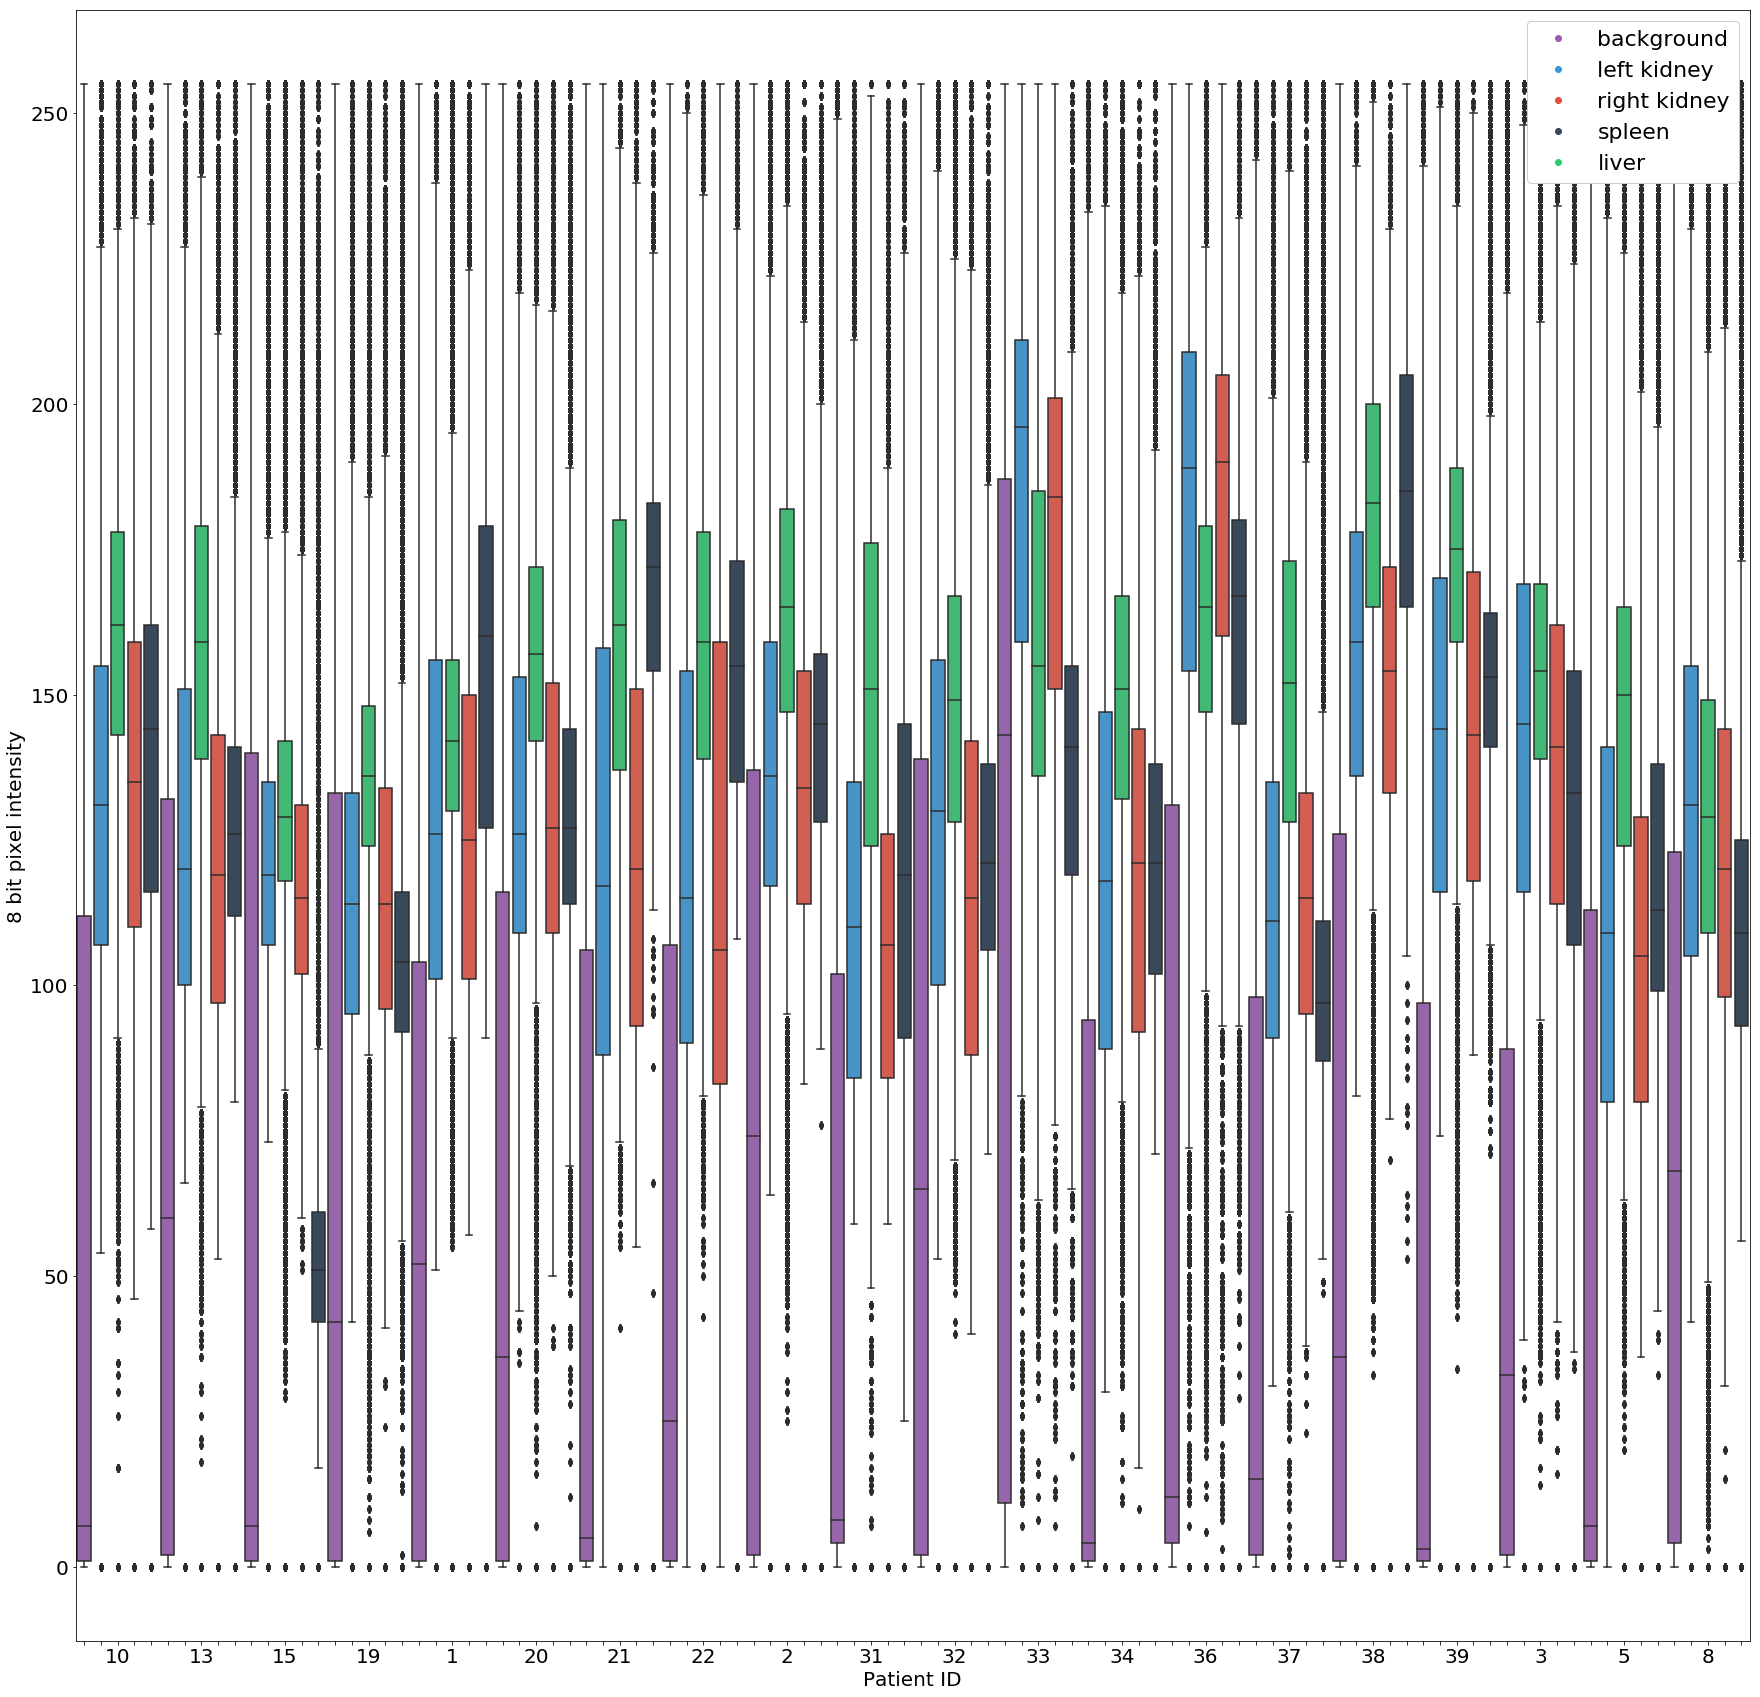

In [45]:
fig,ax=plt.subplots(figsize=(30,30))

sns.boxplot(ax=ax,data=list(filt_df['array']),palette=colour_palette)

ax.set_xticklabels(pat_id_lst_subsample)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in flatui_palette_code.values()]
ax.legend(markers, flatui_palette_code.keys(), numpoints=1,loc=1,
          fontsize='22', title_fontsize='20',facecolor='white', framealpha=1)

ax.set_xlabel('Patient ID',fontsize='20')
ax.set_ylabel('8 bit pixel intensity',fontsize='20')

ax.tick_params(labelsize=20)

In [250]:
def gen_filt_dict(dict_orig,dict_vals):
    """The method to filter dictionary on key values for methods"""
    new_dict=dict()
    
    for vals in dict_vals:
        new_dict[vals]=dict_orig[vals]
        
    return new_dict

In [ ]:
per_img_pat_org_df.to_excel('')

In [ ]:
per_img_slc_org_lst=[]
for k,v in per_img_slc_org.items():
    #Image set for analysis
    img=[x for x in img_types if k.lower().find(x)!=-1]
    #Organ set for analysis
    organ=[y for y in organs if k.lower().find(y)!=-1]
    #Patient id 
    slc_no=int(k.split('_')[-1])
    
    #mean,median,var,min_val,max_val=np_stat_sum(v)
    
    lst_set=[img[0],organ[0],pat_id] #mean,median,var,min_val,max_val
    
    for i in v.T:
        tmp_set=lst_set+[i]
        per_img_pat_org_lst.append(tmp_set)
    
    per_img_slc_org_lst.append(lst_set)

per_img_slc_no_org_df=pd.DataFrame(per_img_pat_org_lst,
                                columns=['image_type','organ','slice_no',
                                        'array'])

In [ ]:
#Iterate through for files in directory path. 
Analysis_lst=[]

for file in glob.glob(dir_pth+'/*.png'):
    
    tmp_img=imageio.imread(file)
    
    img=[x for x in img_types if file.lower().find(x)!=-1]
    organ=[y for y in organs if file.lower().find(y)!=-1]
    #Patient id determined from 
    file_idx=[file.lower().find(x) for x in pat_id_lst if file.lower().find(x)!=-1]
    Pat_id_act=int(file[file.lower().find(Pat_str)+len(Pat_str):file_idx[0]])
    #Getting slice no from file name
    slic_no_uppr_bnd=file.lower().find('uint8.png')
    slic_no_lwr_bnd=file.lower().rfind('mask_')
    slice_no=int(file[slic_no_lwr_bnd+len('mask_'):slic_no_uppr_bnd])
    
    #Dividing image into patches
    tmp_img_pat=div_patches_img(tmp_img)
    try:        
        #Getting statistics
        mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        #Generating list for analysis
        
        
    except ValueError as e:
        print('val error')
        print(tmp_img_pat.shape)
        tmp_img_pat=div_patches_img(tmp_img,(2,2))
        print(tmp_img_pat.shape)
        if tmp_img_pat.shape[0]!=0:
            #Getting statistics
            mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        else:
            tmp_img_pat=div_patches_img(tmp_img,(1,1))
            mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
    
    Analysis_lst.append([img[0],organ[0],Pat_id_act,slice_no,mean,median,var,np.sqrt(var),min_val,max_val])

In [ ]:
org_int_spec_summary_data=pd.DataFrame(Analysis_lst,columns=['image_type','organ_type','pat_id','slice_no',
                                                             'mean','median','variance','std_dev','min','max'])
org_int_spec_summary_data.to_excel('org_int_specific_summary_data.xlsx')

In [ ]:
org_int_spec_summary_data['image_type'].unique()

In [ ]:
gen_boxplot(org_int_spec_summary_data,
            'image_type','mean','Image type','Mean 8 bit pixel intensities',
            'boxplot_img_type_vs_mean_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data,
            'image_type','median','Image type','Median 8 bit pixel intensities',
            'boxplot_img_type_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t1dual_inphase'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'boxplot_t1dual_inphase_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_lineplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t1dual_inphase'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'lineplot_t1dual_inphase_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t1dual_outphase'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'boxplot_t1dual_outphase_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t2spir'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'boxplot_t2spir_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)